In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import sys
import warnings

In [2]:
data=pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [4]:
df=pd.concat([data.Translated_Review,data.Sentiment],axis=1)
df.dropna(axis=0,inplace=True)
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [5]:
df.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [9]:
data.App.value_counts()

Angry Birds Classic                                  320
Bowmasters                                           320
CBS Sports App - Scores, News, Stats & Watch Live    320
Helix Jump                                           300
8 Ball Pool                                          300
                                                    ... 
Detector de Radares Gratis                            31
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Drawing Clothes Fashion Ideas                         30
Easy Hair Style Design                                30
Name: App, Length: 1074, dtype: int64

In [6]:
df.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df.Sentiment]
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",2
9,It helpful site ! It help foods get !,2
10,good you.,0
11,Useful information The amount spelling errors ...,0


Here we will remove characters which are not letters. ":) # $ @ ()!-/*" like that!

Also converting them lower case.

In [7]:
#Data cleaning
import re
first_text=df.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

In [8]:
text

'i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  '

In [9]:
import nltk
#nltk.download("stopwords")
#nltk.download("punkt")
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words

In [10]:
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

In [11]:
#lemmatization books----> book
import nltk as nlp
#nltk.download('wordnet')
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

In [12]:
text_list=[]
for i in df.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [13]:
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

Here with "bag of words" we are removing irrelavent words and creating matrix form in order to make them in order. Also after matrix form we will have our sentences with numbers. This means that now our computer can understand human language!

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=50000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()

aw = pd.Series(all_words)
aw.count()
#print("Most used words: ",all_words)

NameError: name 'text_list' is not defined

In [ ]:
sparce_matrix[0]

In [17]:
y=df.iloc[:,1].values
x=sparce_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
#Random Forest
#holdout method/ k-fold method
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(x_train,y_train)
print("accuracy: ",rf.score(x_test,y_test))

accuracy:  0.877504675394069


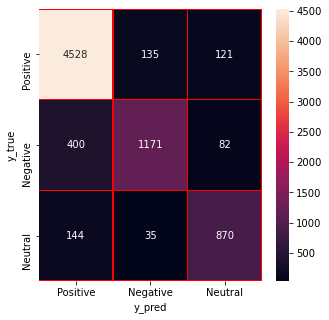

In [19]:
#confussion matrix
y_pred=rf.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [21]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("lr accuracy: ",lr.score(x_test,y_test))

C:\Users\Siddhesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr accuracy:  0.9086294416243654


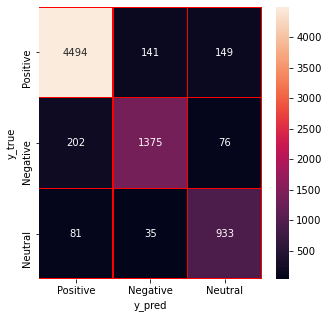

In [22]:
#confussion matrix
y_pred=lr.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

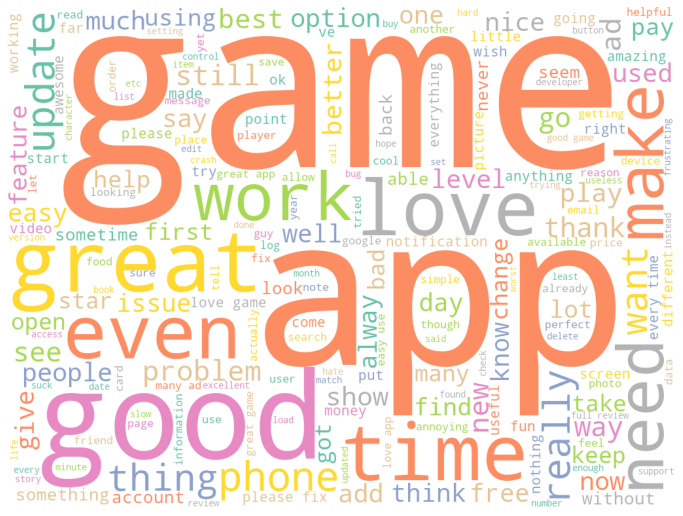

In [23]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768,max_words=200, colormap="Set2").generate(" ".join(text_list[1:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()